In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate,GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export_text
from skompiler import skompile
import graphviz
import seaborn as sns
import pydotplus
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
df = pd.read_csv('super_league.csv',delimiter = ";")

In [4]:
df

,Year,Age,Team Value,transfer_expense,transfer_receive,same_number_of_players_percantage,\ndomestic_balance,Forward_value,Goalkeper_value,last_year_champion,is_in_europe,comes_from_bottom,is_coach_champion,coach_age,is_coach_turkish,points_per_game
0,2005,24.81,90.60,16.04,0.00,0.50,0.78,12.80,4.00,1,1,0,1,52,0,2.35
1,2005,24.66,63.60,3.29,2.00,0.55,0.76,8.00,1.80,0,0,0,0,43,1,2.26
2,2005,25.97,79.65,7.15,7.20,0.44,0.72,8.00,3.50,0,0,0,0,39,0,2.24
3,2005,26.48,76.25,13.70,1.00,0.42,0.82,7.00,2.50,0,0,0,1,53,0,2.03
4,2005,25.45,46.95,0.00,3.30,0.42,0.88,5.00,2.50,0,0,0,0,41,1,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2019,24.20,34.35,5.30,13.40,0.40,0.54,9.00,1.75,0,0,0,1,68,1,1.14
180,2019,26.01,19.25,2.54,0.00,0.49,0.54,0.90,0.75,0,0,0,0,44,1,1.11
181,2019,24.80,28.15,2.48,8.92,0.47,0.63,2.00,1.75,0,0,0,1,62,1,1.08
182,2019,27.40,16.03,2.00,0.00,0.29,0.51,0.85,1.00,0,0,1,0,52,1,1.02


In [5]:
df.dtypes

Year                                   int64
Age                                  float64
Team Value                           float64
transfer_expense                     float64
transfer_receive                     float64
same_number_of_players_percantage    float64
\ndomestic_balance                   float64
Forward_value                        float64
Goalkeper_value                      float64
last_year_champion                     int64
is_in_europe                           int64
comes_from_bottom                      int64
is_coach_champion                      int64
coach_age                              int64
is_coach_turkish                       int64
points_per_game                      float64
dtype: object

In [6]:
df.rename(columns = {'\ndomestic_balance':'domestic_balance'}, inplace = True)

In [7]:
df.last_year_champion = df.last_year_champion.astype(str)

In [8]:
df.is_in_europe  = df.is_in_europe.astype(str)
df.comes_from_bottom = df.comes_from_bottom.astype(str)
df.is_coach_champion  = df.is_coach_champion.astype(str)
df.is_coach_turkish = df.is_coach_turkish.astype(str)

In [9]:
df.dtypes

Year                                   int64
Age                                  float64
Team Value                           float64
transfer_expense                     float64
transfer_receive                     float64
same_number_of_players_percantage    float64
domestic_balance                     float64
Forward_value                        float64
Goalkeper_value                      float64
last_year_champion                    object
is_in_europe                          object
comes_from_bottom                     object
is_coach_champion                     object
coach_age                              int64
is_coach_turkish                      object
points_per_game                      float64
dtype: object

In [10]:
df.rename(columns = {'Team Value':'team_Value'}, inplace = True)

In [11]:
Mean=df.groupby('Year').team_Value.transform('mean')    
Std=df.groupby('Year').team_Value.transform('std')

In [12]:
df.team_Value = (df.team_Value - Mean) / Std

In [13]:
Mean=df.groupby('Year').transfer_expense.transform('mean')    
Std=df.groupby('Year').transfer_expense.transform('std')

In [14]:
df.transfer_expense = (df.transfer_expense - Mean) / Std

In [15]:
Mean=df.groupby('Year').transfer_receive.transform('mean')    
Std=df.groupby('Year').transfer_receive.transform('std')

In [16]:
df.transfer_receive = (df.transfer_receive - Mean) / Std

In [17]:
Mean=df.groupby('Year').Forward_value.transform('mean')    
Std=df.groupby('Year').Forward_value.transform('std')
df.Forward_value = (df.Forward_value - Mean) / Std

In [18]:
Mean=df.groupby('Year').Goalkeper_value.transform('mean')    
Std=df.groupby('Year').Goalkeper_value.transform('std')
df.Goalkeper_value = (df.Goalkeper_value - Mean) / Std

In [19]:
df.describe()

,Year,Age,team_Value,transfer_expense,transfer_receive,same_number_of_players_percantage,domestic_balance,Forward_value,Goalkeper_value,coach_age,points_per_game
count,184.000000,184.000000,1.840000e+02,1.840000e+02,1.840000e+02,184.000000,184.000000,1.840000e+02,1.840000e+02,184.000000,184.000000
mean,2012.951087,25.747446,1.025750e-17,-6.033821e-19,1.206764e-18,0.422519,0.665960,3.620292e-18,-1.206764e-17,48.195652,1.375077
std,6.639244,1.064792,9.750998e-01,9.750998e-01,9.750998e-01,0.133088,0.106285,9.750998e-01,9.750998e-01,7.816529,0.402989
min,2005.000000,23.200000,-1.256077e+00,-7.836583e-01,-1.036539e+00,0.045455,0.440000,-1.293283e+00,-1.799703e+00,32.000000,0.520000
25%,2007.000000,25.000000,-6.059093e-01,-5.410720e-01,-5.744218e-01,0.340000,0.570000,-6.204171e-01,-6.115679e-01,43.000000,1.119412
50%,2010.000000,25.700000,-3.935756e-01,-4.209105e-01,-3.974969e-01,0.415882,0.690000,-3.525180e-01,-3.238931e-01,47.000000,1.260000
75%,2020.000000,26.400000,1.250901e-01,-5.635019e-02,1.809576e-01,0.492500,0.760000,3.107774e-01,2.593469e-01,53.000000,1.618235
max,2022.000000,28.500000,3.005371e+00,3.352880e+00,4.099826e+00,0.780000,0.880000,3.505405e+00,3.464129e+00,73.000000,2.440000


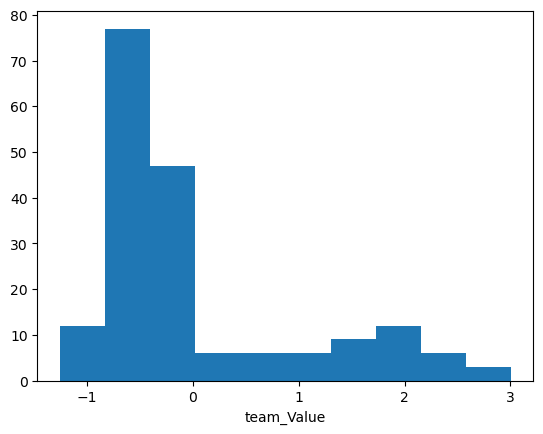

In [20]:
plt.hist(df["team_Value"])
plt.xlabel("team_Value")
plt.show()

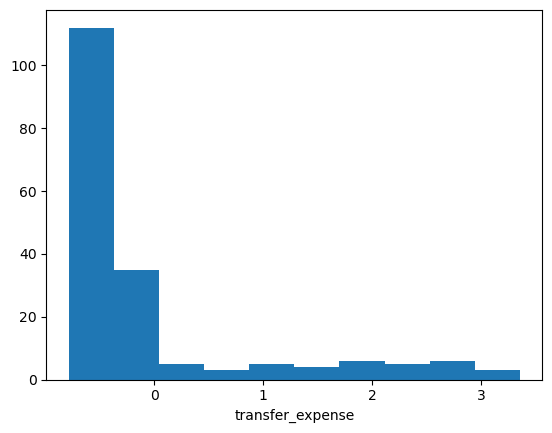

In [21]:
plt.hist(df["transfer_expense"])
plt.xlabel("transfer_expense")
plt.show()

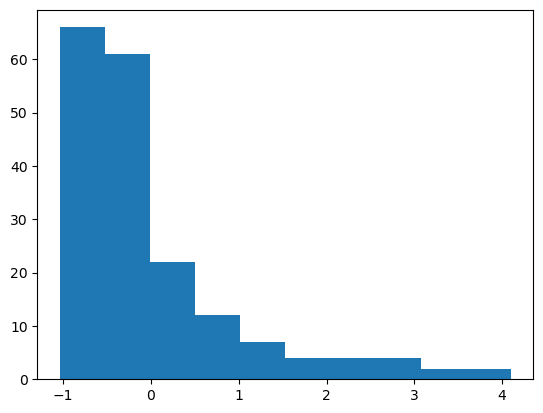

In [21]:
plt.hist(df["transfer_receive"])
plt.show()

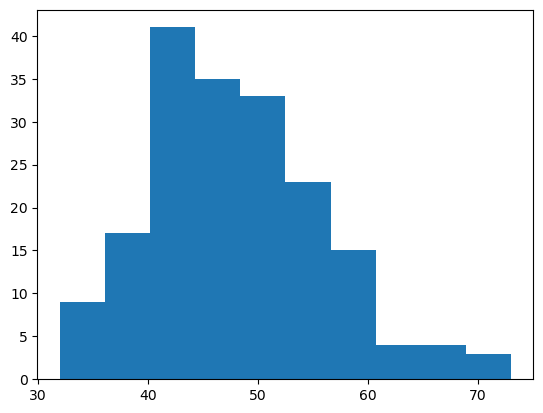

In [22]:
plt.hist(df["coach_age"])
plt.show()

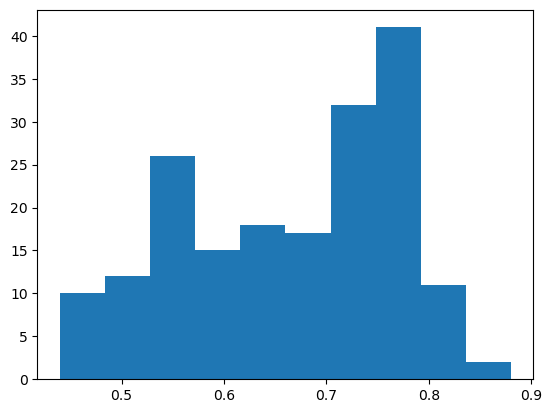

In [23]:
plt.hist(df["domestic_balance"])
plt.show()

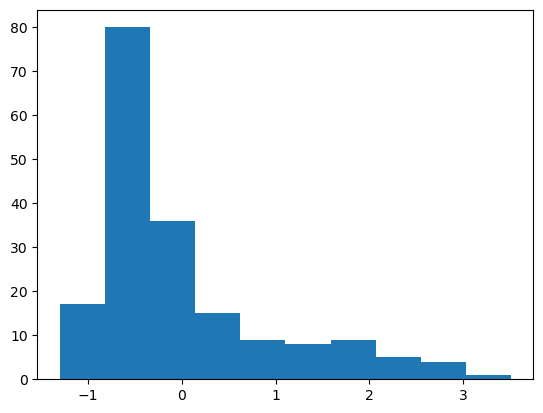

In [24]:
plt.hist(df["Forward_value"])
plt.show()

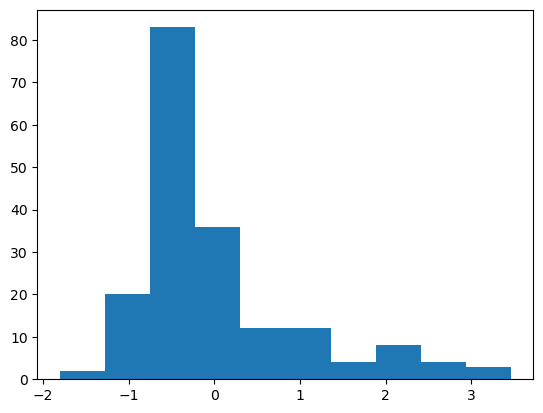

In [25]:
plt.hist(df["Goalkeper_value"])
plt.show()

In [26]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

In [27]:
binary_cols

['last_year_champion',
 'is_in_europe',
 'comes_from_bottom',
 'is_coach_champion',
 'is_coach_turkish']

In [28]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [29]:
for col in binary_cols:
    label_encoder(df, col)

In [30]:
df

,Year,Age,team_Value,transfer_expense,transfer_receive,same_number_of_players_percantage,domestic_balance,Forward_value,Goalkeper_value,last_year_champion,is_in_europe,comes_from_bottom,is_coach_champion,coach_age,is_coach_turkish,points_per_game
0,2005,24.81,2.231768,2.791840,-0.560706,0.50,0.78,2.893074,2.584397,1,1,0,1,52,0,2.35
1,2005,24.66,1.035175,0.191855,0.505894,0.55,0.76,1.293831,0.082145,0,0,0,0,43,1,2.26
2,2005,25.97,1.746483,0.978988,3.279054,0.44,0.72,1.293831,2.015703,0,0,0,0,39,0,2.24
3,2005,26.48,1.595801,2.314666,-0.027406,0.42,0.82,0.960656,0.878316,0,0,0,1,53,0,2.03
4,2005,25.45,0.297277,-0.479043,1.199184,0.42,0.88,0.294305,0.878316,0,0,0,0,41,1,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2019,24.20,-0.201124,0.004669,0.596836,0.40,0.54,2.514322,0.107792,0,0,0,1,68,1,1.14
180,2019,26.01,-0.662981,-0.322060,-0.817556,0.49,0.54,-0.659601,-0.610820,0,0,0,0,44,1,1.11
181,2019,24.80,-0.390760,-0.329163,0.123964,0.47,0.63,-0.228575,0.107792,0,0,0,1,62,1,1.08
182,2019,27.40,-0.761470,-0.385985,-0.817556,0.29,0.51,-0.679193,-0.431167,0,0,1,0,52,1,1.02


In [31]:
scaler = StandardScaler()

In [32]:
df["Age"] = scaler.fit_transform(df[["Age"]])

In [33]:
df["coach_age"] = scaler.fit_transform(df[["coach_age"]])

In [34]:
df

,Year,Age,team_Value,transfer_expense,transfer_receive,same_number_of_players_percantage,domestic_balance,Forward_value,Goalkeper_value,last_year_champion,is_in_europe,comes_from_bottom,is_coach_champion,coach_age,is_coach_turkish,points_per_game
0,2005,-0.882804,2.231768,2.791840,-0.560706,0.50,0.78,2.893074,2.584397,1,1,0,1,0.488034,0,2.35
1,2005,-1.024061,1.035175,0.191855,0.505894,0.55,0.76,1.293831,0.082145,0,0,0,0,-0.666514,1,2.26
2,2005,0.209582,1.746483,0.978988,3.279054,0.44,0.72,1.293831,2.015703,0,0,0,0,-1.179647,0,2.24
3,2005,0.689856,1.595801,2.314666,-0.027406,0.42,0.82,0.960656,0.878316,0,0,0,1,0.616317,0,2.03
4,2005,-0.280108,0.297277,-0.479043,1.199184,0.42,0.88,0.294305,0.878316,0,0,0,0,-0.923081,1,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2019,-1.457249,-0.201124,0.004669,0.596836,0.40,0.54,2.514322,0.107792,0,0,0,1,2.540563,1,1.14
180,2019,0.247251,-0.662981,-0.322060,-0.817556,0.49,0.54,-0.659601,-0.610820,0,0,0,0,-0.538231,1,1.11
181,2019,-0.892222,-0.390760,-0.329163,0.123964,0.47,0.63,-0.228575,0.107792,0,0,0,1,1.770864,1,1.08
182,2019,1.556231,-0.761470,-0.385985,-0.817556,0.29,0.51,-0.679193,-0.431167,0,0,1,0,0.488034,1,1.02


In [35]:
X = df.drop(['points_per_game','Year'], axis=1)

In [36]:
y = df[['points_per_game']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [38]:
reg_model = LinearRegression().fit(X_train, y_train)

In [39]:
reg_model.intercept_

array([1.18666269])

In [40]:
reg_model.coef_

array([[ 0.05713628,  0.32433644, -0.02800307, -0.04397459,  0.40292705,
         0.07161354,  0.02322057,  0.05767404, -0.07698617, -0.14186639,
        -0.0966258 , -0.0129096 , -0.05164078,  0.02967257]])

In [41]:
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

0.22685652469345688

In [42]:
reg_model.score(X_train, y_train)

0.6705075067246473

In [43]:
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.27890364612090074

In [44]:
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

0.2589147979388041

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [46]:
cart_model = DecisionTreeRegressor(random_state=17).fit(X_train, y_train)


In [47]:
cv_results = cross_validate(cart_model,
                            X, y,
                            cv=5,
                            scoring=['neg_mean_squared_error'])

In [48]:
-cv_results['test_neg_mean_squared_error'].mean()

0.10160979624763022

In [49]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [50]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

In [51]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=1).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [52]:
cart_best_grid.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [53]:
cart_best_grid.best_score_

0.5076854253639509

In [54]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=1).fit(X, y)

In [55]:
cv_results = cross_validate(cart_final,
                            X, y,
                            cv=5,
                            scoring=['neg_mean_squared_error'])

In [56]:
-cv_results['test_neg_mean_squared_error'].mean()

0.07981950562855794

In [57]:
cart_final.feature_importances_

array([0.        , 0.94776338, 0.        , 0.05223662, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [58]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

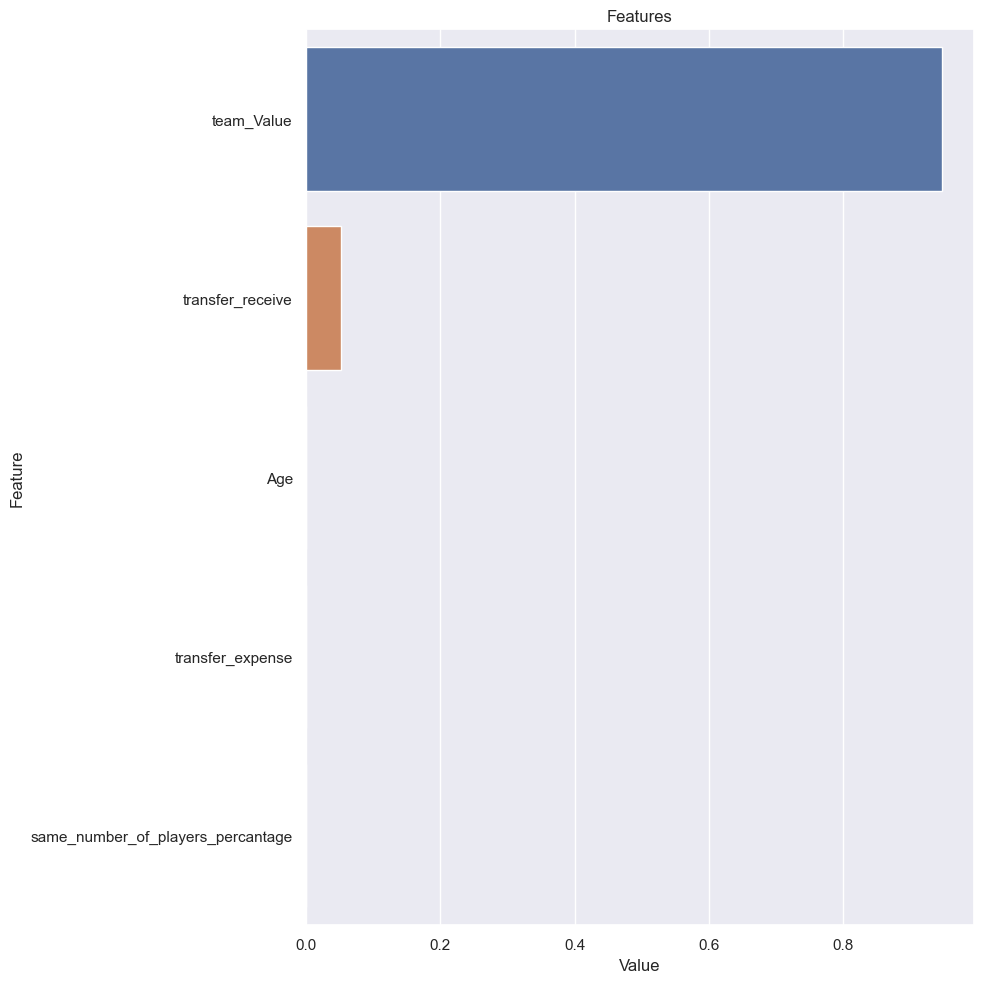

In [59]:
plot_importance(cart_final, X, num=5)

In [60]:
def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)

In [61]:
tree_graph(model=cart_final, col_names=X.columns, file_name="cart_final.png")

In [62]:
gbm_model = GradientBoostingRegressor(random_state=1)

In [63]:
gbm_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [64]:
cv_results = cross_validate(gbm_model, X, y, cv=5, scoring=['neg_mean_squared_error'])

C:\Users\90535\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [65]:
-cv_results['test_neg_mean_squared_error'].mean()

0.08153981811162637

In [66]:
gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8, 10],
              "n_estimators": [100, 500, 1000],
              "subsample": [1, 0.5, 0.7]}

In [67]:
gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\90535\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
gbm_best_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}

In [69]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=1, ).fit(X, y)

C:\Users\90535\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
cv_results = cross_validate(gbm_final, X, y, cv=5, scoring=['neg_mean_squared_error'])

C:\Users\90535\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90535\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [71]:
-cv_results['test_neg_mean_squared_error'].mean()

0.07126978829255132

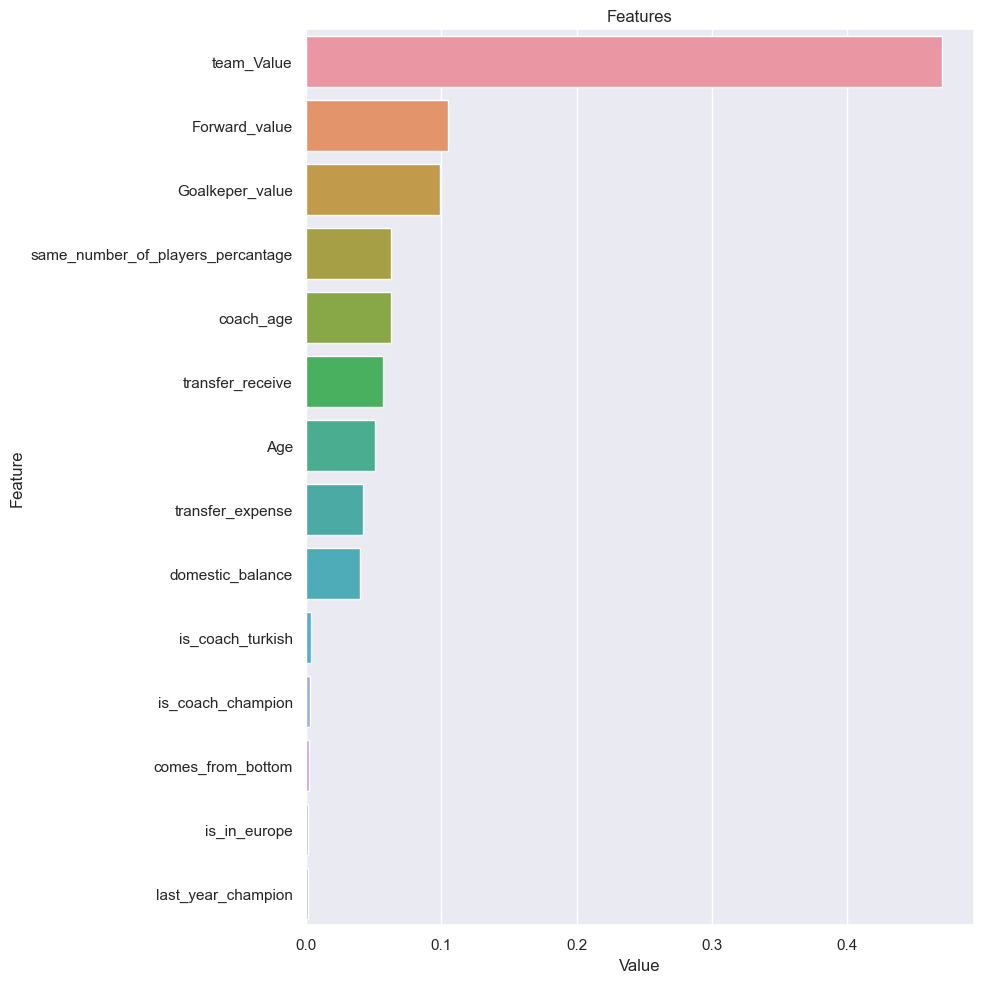

In [72]:
plot_importance(gbm_final, X)

In [73]:
df_2 = pd.read_csv('super_league_2.csv',delimiter = ";")

In [74]:
df_2

,Year,Age,Team Value,transfer_expense,transfer_receive,same_number_of_players_percantage,\ndomestic_balance,Forward_value,Goalkeper_value,last_year_champion,is_in_europe,comes_from_bottom,is_coach_champion,coach_age,is_coach_turkish
0,2023,26.1,176.95,29.810,30.050,0.570,0.47,10.0,13.000,0,1,0,1,68,0
1,2023,25.6,148.50,19.300,19.310,0.410,0.50,7.5,14.000,1,1,0,1,59,1
2,2023,25.7,141.03,31.540,13.000,0.450,0.45,17.5,1.700,0,0,0,1,49,1
3,2023,26.9,121.18,19.050,10.000,0.500,0.50,14.0,9.000,0,0,0,1,70,1
4,2023,26.9,58.48,6.700,0.000,0.550,0.45,2.5,0.900,0,1,0,0,42,1
5,2023,26.9,41.33,0.995,3.550,0.370,0.52,1.5,1.500,0,0,0,0,46,1
6,2023,24.8,39.28,0.000,0.000,0.470,0.53,3.0,1.200,0,0,0,0,33,0
7,2023,27.0,37.98,1.700,4.120,0.370,0.43,3.0,0.400,0,0,0,1,48,0
8,2023,27.7,33.30,1.880,4.000,0.480,0.48,3.4,0.550,0,0,0,0,34,1
9,2023,27.2,32.78,1.210,0.167,0.375,0.50,2.5,1.500,0,0,1,0,45,1


In [75]:
df_2.rename(columns = {'\ndomestic_balance':'domestic_balance'}, inplace = True)

In [76]:
df_2.last_year_champion = df.last_year_champion.astype(str)

In [77]:
df_2.is_in_europe  = df_2.is_in_europe.astype(str)
df_2.comes_from_bottom = df_2.comes_from_bottom.astype(str)
df_2.is_coach_champion  = df_2.is_coach_champion.astype(str)
df_2.is_coach_turkish = df_2.is_coach_turkish.astype(str)

In [78]:
df_2.rename(columns = {'Team Value':'team_Value'}, inplace = True)

In [79]:
Mean=df_2.groupby('Year').team_Value.transform('mean')    
Std=df_2.groupby('Year').team_Value.transform('std')
df_2.team_Value = (df_2.team_Value - Mean) / Std

In [80]:
Mean=df_2.groupby('Year').transfer_expense.transform('mean')    
Std=df_2.groupby('Year').transfer_expense.transform('std')
df_2.transfer_expense = (df_2.transfer_expense - Mean) / Std

In [81]:
Mean=df_2.groupby('Year').transfer_receive.transform('mean')    
Std=df_2.groupby('Year').transfer_receive.transform('std')
df_2.transfer_receive = (df_2.transfer_receive - Mean) / Std

In [82]:
Mean=df_2.groupby('Year').Forward_value.transform('mean')    
Std=df_2.groupby('Year').Forward_value.transform('std')
df_2.Forward_value = (df_2.Forward_value - Mean) / Std

In [83]:
Mean=df_2.groupby('Year').Goalkeper_value.transform('mean')    
Std=df_2.groupby('Year').Goalkeper_value.transform('std')
df_2.Goalkeper_value = (df_2.Goalkeper_value - Mean) / Std

In [88]:
binary_cols_2 = [col for col in df_2.columns if df_2[col].dtype not in [int, float]
               and df_2[col].nunique() == 2]

In [89]:
binary_cols_2 

['last_year_champion',
 'is_in_europe',
 'comes_from_bottom',
 'is_coach_champion',
 'is_coach_turkish']

In [90]:
df_2["Age"] = scaler.fit_transform(df_2[["Age"]])

In [91]:
df_2["coach_age"] = scaler.fit_transform(df_2[["coach_age"]])

In [92]:
for col in binary_cols:
    label_encoder(df_2, col)

In [93]:
X_2 = df_2.drop(['Year'], axis=1)

In [101]:
predictions = gbm_final.predict(X_2.to_numpy())

C:\Users\90535\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [102]:
df_2["Predictions"] = 36 *  predictions

In [103]:
df_2

,Year,Age,team_Value,transfer_expense,transfer_receive,same_number_of_players_percantage,domestic_balance,Forward_value,Goalkeper_value,last_year_champion,is_in_europe,comes_from_bottom,is_coach_champion,coach_age,is_coach_turkish,Predictions
0,2023,-0.308979,2.392698,2.267399,3.149457,0.570,0.47,1.211410,2.413953,1,1,0,1,2.089876,0,67.448595
1,2023,-0.774901,1.839205,1.261007,1.788868,0.410,0.50,0.671617,2.646919,0,1,0,1,1.146950,1,66.913541
2,2023,-0.681717,1.693877,2.433057,0.989491,0.450,0.45,2.830790,-0.218559,0,0,0,1,0.099255,1,63.937519
3,2023,0.436495,1.307697,1.237068,0.609438,0.500,0.50,2.075079,1.482091,0,0,0,1,2.299415,1,66.646956
4,2023,0.436495,0.087875,0.054485,-0.657405,0.550,0.45,-0.407970,-0.404931,0,1,0,0,-0.634131,1,54.559387
5,2023,0.436495,-0.245777,-0.491801,-0.207675,0.370,0.52,-0.623887,-0.265152,0,0,0,0,-0.215053,1,41.296426
6,2023,-1.520375,-0.285659,-0.587078,-0.657405,0.470,0.53,-0.300011,-0.335041,0,0,0,0,-1.577057,0,52.169518
7,2023,0.529679,-0.310951,-0.424294,-0.135465,0.370,0.43,-0.300011,-0.521414,0,0,0,1,-0.005514,0,43.135145
8,2023,1.181969,-0.402000,-0.407057,-0.150668,0.480,0.48,-0.213645,-0.486469,0,0,0,0,-1.472287,1,50.629653
9,2023,0.716048,-0.412116,-0.471214,-0.636248,0.375,0.50,-0.407970,-0.265152,0,0,1,0,-0.319823,1,40.475712


In [105]:
df_2["Teams"] = ["Fenerbahce", "Trabzonspor" , "Galatasaray", "Besiktas", "Basaksehir","Konyaspor","Alanyaspor","Adana Demir","Antalya","Ankaragücü","Sivasspor","Kayserispor","Kasimpasa","Gaziantep","Hatay","Karagümrük","Giresun","Istanbulspor","Umraniyespor"]

In [109]:
df_2.loc[:,["Teams","Predictions"]].sort_values(by=['Predictions'], ascending = False)

,Teams,Predictions
0,Fenerbahce,67.448595
1,Trabzonspor,66.913541
3,Besiktas,66.646956
2,Galatasaray,63.937519
4,Basaksehir,54.559387
6,Alanyaspor,52.169518
8,Antalya,50.629653
10,Sivasspor,48.972141
14,Hatay,47.901721
11,Kayserispor,47.015473
